<a href="https://colab.research.google.com/github/ShalilG/Stock-Market-Analysis/blob/main/CryptoReturns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 712 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [2]:
#Description: This program analyzes ETFs

In [3]:
import pandas as pd 
import yfinance as yf
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

In [24]:
#Load the data 
tick = 'BTC-USD', 'ETH-USD', 'SOL-USD', 'LINK-USD', 'ADA-USD', 'BNB-USD', 'DOGE-USD', 'XRP-USD', 'LTC-USD', 'SHIB-USD'

#Show the data
df = yf.download(tick, start = '2019-02-25', end = '2022-8-5')
df = df[['Adj Close']]

df

[*********************100%***********************]  10 of 10 completed


Adj Close                                                   \
             ADA-USD     BNB-USD       BTC-USD  DOGE-USD      ETH-USD   
Date                                                                    
2019-02-25  0.044043    9.842012   3882.696289  0.002030   139.822861   
2019-02-26  0.043304    9.521595   3854.357910  0.002023   138.089676   
2019-02-27  0.043270    9.899132   3851.047363  0.002019   136.125961   
2019-02-28  0.043123   10.365178   3854.785400  0.001976   136.746246   
2019-03-01  0.043279   11.393217   3859.583740  0.001994   136.443619   
...              ...         ...           ...       ...          ...   
2022-07-31  0.517020  283.579468  23336.896484  0.068272  1681.517334   
2022-08-01  0.514123  283.539490  23314.199219  0.068725  1635.195801   
2022-08-02  0.496833  283.820984  22978.117188  0.066694  1632.945435   
2022-08-03  0.500988  298.356781  22846.507812  0.066195  1618.874512   
2022-08-04  0.499668  310.706055  22630.957031  0.067357  1608.205811   

                                                                
            LINK-USD    LTC-USD  SHIB-USD    SOL-USD   XRP-USD  
Date                                                            
2019-02-25  0.470638  46.213066       NaN        NaN  0.328510  
2019-02-26  0.437432  45.491131       NaN        NaN  0.319477  
2019-02-27  0.431479  45.581425       NaN        NaN  0.313106  
2019-02-28  0.427421  46.237255       NaN        NaN  0.315078  
2019-03-01  0.431785  47.487240       NaN        NaN  0.317312  
...              ...        ...       ...        ...       ...  
2022-07-31  7.666137  59.909508  0.000012  42.400204  0.380458  
2022-08-01  7.586885  59.535446  0.000012  41.786484  0.379976  
2022-08-02  7.208192  58.243855  0.000012  39.754505  0.372021  
2022-08-03  7.286331  57.805191  0.000012  38.544418  0.369852  
2022-08-04  7.356004  59.848576  0.000012  38.830673  0.371351  

[1257 rows x 10 columns]

In [25]:
cols = df.columns 

In [26]:
#Get the DSR
daily_simple_returns = df[cols].pct_change(1)
daily_simple_returns

Adj Close                                                    \
             ADA-USD   BNB-USD   BTC-USD  DOGE-USD   ETH-USD  LINK-USD   
Date                                                                     
2019-02-25       NaN       NaN       NaN       NaN       NaN       NaN   
2019-02-26 -0.016779 -0.032556 -0.007299 -0.003448 -0.012396 -0.070555   
2019-02-27 -0.000785  0.039651 -0.000859 -0.001977 -0.014221 -0.013609   
2019-02-28 -0.003397  0.047080  0.000971 -0.021298  0.004557 -0.009405   
2019-03-01  0.003618  0.099182  0.001245  0.009109 -0.002213  0.010210   
...              ...       ...       ...       ...       ...       ...   
2022-07-31 -0.016279 -0.013761 -0.013498 -0.019700 -0.008521 -0.017589   
2022-08-01 -0.005603 -0.000141 -0.000973  0.006635 -0.027547 -0.010338   
2022-08-02 -0.033630  0.000993 -0.014415 -0.029553 -0.001376 -0.049914   
2022-08-03  0.008363  0.051215 -0.005728 -0.007482 -0.008617  0.010840   
2022-08-04 -0.002635  0.041391 -0.009435  0.017554 -0.006590  0.009562   

                                                   
             LTC-USD SHIB-USD   SOL-USD   XRP-USD  
Date                                               
2019-02-25       NaN      NaN       NaN       NaN  
2019-02-26 -0.015622      NaN       NaN -0.027497  
2019-02-27  0.001985      NaN       NaN -0.019942  
2019-02-28  0.014388      NaN       NaN  0.006298  
2019-03-01  0.027034      NaN       NaN  0.007090  
...              ...      ...       ...       ...  
2022-07-31 -0.008780      0.0 -0.030983 -0.018841  
2022-08-01 -0.006244      0.0 -0.014474 -0.001267  
2022-08-02 -0.021694      0.0 -0.048628 -0.020936  
2022-08-03 -0.007531      0.0 -0.030439 -0.005830  
2022-08-04  0.035349      0.0  0.007427  0.004053  

[1257 rows x 10 columns]

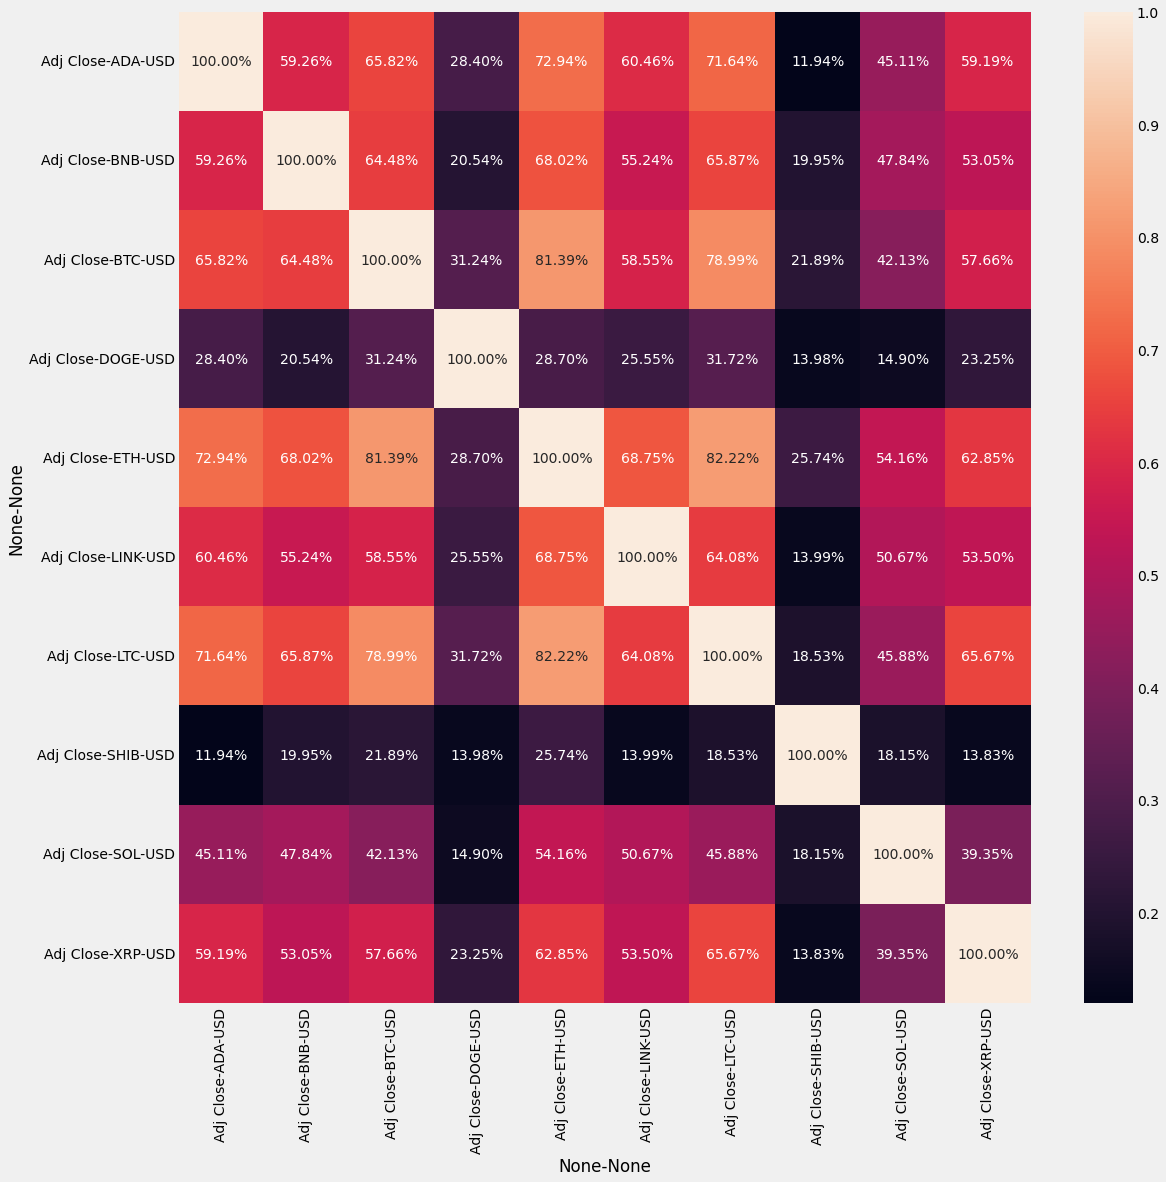

In [27]:
#Show the correlation 
plt.subplots(figsize=(17,17))
sns.heatmap(daily_simple_returns.corr(), annot= True, fmt= '.2%')

In [28]:
#Show the co-variance matrix
daily_simple_returns.cov()

Adj Close                                          \
                     ADA-USD   BNB-USD   BTC-USD  DOGE-USD   ETH-USD   
Adj Close ADA-USD   0.003367  0.001928  0.001476  0.002071  0.002072   
          BNB-USD   0.001928  0.003144  0.001397  0.001447  0.001867   
          BTC-USD   0.001476  0.001397  0.001494  0.001517  0.001540   
          DOGE-USD  0.002071  0.001447  0.001517  0.015785  0.001766   
          ETH-USD   0.002072  0.001867  0.001540  0.001766  0.002397   
          LINK-USD  0.002359  0.002083  0.001521  0.002158  0.002263   
          LTC-USD   0.002173  0.001931  0.001596  0.002083  0.002104   
          SHIB-USD  0.001735  0.002551  0.002101  0.002420  0.003295   
          SOL-USD   0.002242  0.002310  0.001277  0.001835  0.002182   
          XRP-USD   0.002067  0.001790  0.001341  0.001758  0.001852   

                                                                      
                    LINK-USD   LTC-USD  SHIB-USD   SOL-USD   XRP-USD  
Adj Close ADA-USD   0.002359  0.002173  0.001735  0.002242  0.002067  
          BNB-USD   0.002083  0.001931  0.002551  0.002310  0.001790  
          BTC-USD   0.001521  0.001596  0.002101  0.001277  0.001341  
          DOGE-USD  0.002158  0.002083  0.002420  0.001835  0.001758  
          ETH-USD   0.002263  0.002104  0.003295  0.002182  0.001852  
          LINK-USD  0.004520  0.002252  0.002287  0.002717  0.002164  
          LTC-USD   0.002252  0.002732  0.002543  0.001979  0.002065  
          SHIB-USD  0.002287  0.002543  0.062139  0.003291  0.001979  
          SOL-USD   0.002717  0.001979  0.003291  0.006701  0.002156  
          XRP-USD   0.002164  0.002065  0.001979  0.002156  0.003621

In [29]:
#Get the variance 
daily_simple_returns.var()

Adj Close  ADA-USD     0.003367
           BNB-USD     0.003144
           BTC-USD     0.001494
           DOGE-USD    0.015785
           ETH-USD     0.002397
           LINK-USD    0.004520
           LTC-USD     0.002732
           SHIB-USD         NaN
           SOL-USD     0.006701
           XRP-USD     0.003621
dtype: float64

In [30]:
#Get volatility 
daily_simple_returns.std() * 100

Adj Close  ADA-USD      5.802662
           BNB-USD      5.607301
           BTC-USD      3.864736
           DOGE-USD    12.563818
           ETH-USD      4.896369
           LINK-USD     6.723241
           LTC-USD      5.226653
           SHIB-USD          NaN
           SOL-USD      8.185727
           XRP-USD      6.017236
dtype: float64

In [31]:
#Show the average daily simple returns 
daily_simple_returns.mean() * 100

Adj Close  ADA-USD     0.360878
           BNB-USD     0.428124
           BTC-USD     0.216541
           DOGE-USD    0.694069
           ETH-USD     0.317379
           LINK-USD    0.443120
           LTC-USD     0.159997
           SHIB-USD         inf
           SOL-USD     0.768084
           XRP-USD     0.185982
dtype: float64

In [32]:
annualized_returns = daily_simple_returns.mean() * 100 * 252
annualized_returns

Adj Close  ADA-USD      90.941222
           BNB-USD     107.887137
           BTC-USD      54.568307
           DOGE-USD    174.905319
           ETH-USD      79.979439
           LINK-USD    111.666240
           LTC-USD      40.319285
           SHIB-USD           inf
           SOL-USD     193.557227
           XRP-USD      46.867410
dtype: float64